<a href="https://colab.research.google.com/github/0su1327/Graduation_Thesis/blob/main/Intrusion_detection_dataset(nsl_kdd).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset_train=pd.read_csv('/content/drive/MyDrive/colab_refer_data/kdd_train.csv')

In [ ]:
dataset_test=pd.read_csv('/content/drive/MyDrive/colab_refer_data/kdd_test.csv')

In [ ]:
dataset_train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.25,0.26,0.27,0.05,0.28,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [ ]:
dataset_test.shape

(22543, 43)

In [ ]:
dataset_train.shape

(125972, 43)

In [ ]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty_level"]

In [ ]:
# Assigning attribute name to dataset
dataset_train = pd.read_csv("/content/drive/MyDrive/colab_refer_data/kdd_train.csv", names =col_names)
dataset_test = pd.read_csv("/content/drive/MyDrive/colab_refer_data/kdd_test.csv", names =col_names)
print(dataset_train.shape)

(125973, 43)


In [ ]:
features = dataset_train.drop(columns=['protocol_type', 'service', 'flag'

]).columns

X_train = dataset_train[features]


In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

# # 데이터 로드
# df = pd.read_csv("unsw_nb15.csv")

# 특성과 레이블 분리
X = X_train.drop("label", axis=1)  # 특성 (독립 변수)
y = X_train["label"]  # 레이블 (종속 변수)

# mutual importance 계산
mutual_scores = mutual_info_classif(X, y)

# 결과 출력
feature_importance = pd.DataFrame({"Feature": X.columns, "Importance": mutual_scores})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
print(feature_importance)

                        Feature  Importance
1                     src_bytes    0.931779
26                diff_srv_rate    0.657337
25                same_srv_rate    0.624173
31       dst_host_diff_srv_rate    0.614206
30       dst_host_same_srv_rate    0.562295
19                        count    0.561430
29           dst_host_srv_count    0.541308
2                     dst_bytes    0.501578
34         dst_host_serror_rate    0.500891
21                  serror_rate    0.476706
35     dst_host_srv_serror_rate    0.445610
22              srv_serror_rate    0.426686
32  dst_host_same_src_port_rate    0.386210
38             difficulty_level    0.364225
8                     logged_in    0.354980
33  dst_host_srv_diff_host_rate    0.325230
20                    srv_count    0.295921
28               dst_host_count    0.293276
36         dst_host_rerror_rate    0.201526
27           srv_diff_host_rate    0.186196
37     dst_host_srv_rerror_rate    0.153237
23                  rerror_rate 

In [ ]:
corr = dataset_train.corr(method='pearson')
corr

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,difficulty_level
duration,1.000000,0.070737,0.034878,-0.001553,-0.009866,0.003830,0.000705,0.009528,-0.064218,0.042679,...,-0.109776,-0.116005,0.254195,0.228737,-0.026669,-0.064948,-0.064361,0.173815,0.199024,-0.156311
src_bytes,0.070737,1.000000,0.000204,-0.000109,-0.000693,-0.000059,0.000295,-0.000208,-0.003353,-0.000086,...,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,-0.022592
dst_bytes,0.034878,0.000204,1.000000,-0.000069,-0.000440,0.000248,-0.000344,0.000504,-0.002894,0.001233,...,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,-0.018076
land,-0.001553,-0.000109,-0.000069,1.000000,-0.001261,-0.000109,-0.001340,-0.000381,-0.011402,-0.000164,...,-0.014159,0.011597,-0.004516,0.033851,0.070474,0.019840,0.012276,-0.005222,-0.005303,-0.037038
wrong_fragment,-0.009866,-0.000693,-0.000440,-0.001261,1.000000,-0.000692,-0.008508,-0.002418,-0.072418,-0.001044,...,-0.045240,-0.048733,0.059797,0.037177,-0.016252,-0.051917,-0.055917,0.028890,-0.033682,-0.157130
urgent,0.003830,-0.000059,0.000248,-0.000109,-0.000692,1.000000,0.000293,0.097507,0.007299,0.033329,...,-0.007897,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,-0.016411
hot,0.000705,0.000295,-0.000344,-0.001340,-0.008508,0.000293,1.000000,0.003715,0.116435,0.002014,...,-0.051864,-0.036293,-0.012293,-0.034536,-0.024715,-0.058222,-0.058214,-0.030555,-0.031670,-0.160013
num_failed_logins,0.009528,-0.000208,0.000504,-0.000381,-0.002418,0.097507,0.003715,1.000000,-0.006439,0.019085,...,-0.023053,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359,-0.073178
logged_in,-0.064218,-0.003353,-0.002894,-0.011402,-0.072418,0.007299,0.116435,-0.006439,1.000000,0.014413,...,0.624365,0.604058,-0.256065,-0.160994,-0.055953,-0.491478,-0.493264,-0.275972,-0.272806,0.269818
num_compromised,0.042679,-0.000086,0.001233,-0.000164,-0.001044,0.033329,0.002014,0.019085,0.014413,1.000000,...,-0.010321,-0.004995,0.002981,-0.002045,0.004252,-0.004377,-0.004898,-0.003647,-0.003219,-0.006101


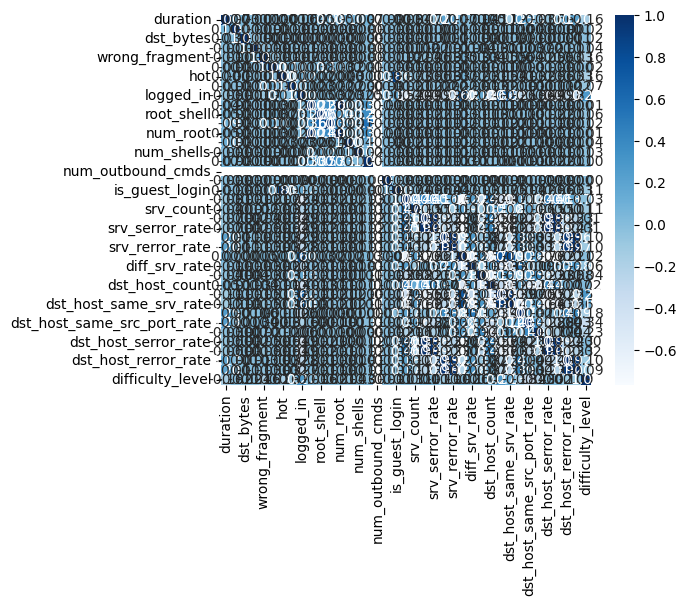

In [ ]:
#  0.3부터 0.7 사이면 뚜렷한 양적 선형관계, 0.7 이상이면 강한 양적 상관관계라 할 수 있습니다.
import matplotlib.pyplot as plt
import seaborn as sns


df_heatmap = sns.heatmap(corr, cbar = True, annot = True,
                         fmt = '.2f', square = True, cmap = 'Blues')

#  annot_kws={'size' : 5}

In [ ]:
#label distribution of Training set and testing set
print('label distribution Training set:')
print(dataset_train['label'].value_counts())
print()
print('label distribution Test set:')
print(dataset_test['label'].value_counts())

# attack category의 데이터 불균형이 존재하기 때문에 어떤 방식으로든 attack 유형들간의 불균형을 없애야지 좀더 명확한 측정이 가능할 것으로 보인다.

label distribution Training set:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

label distribution Test set:
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178


In [ ]:
dataset_train.isnull().sum()
# 결측값 제거(0값이 많은 값들)

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
# categorical_columns=['protocol_type', 'service', 'flag']
# # insert code to get a list of categorical columns into a variable, categorical_columns
# categorical_columns=['protocol_type', 'service', 'flag']
#  # Get the categorical values into a 2D numpy array
# dataset_train_categorical_values = dataset_train[categorical_columns]
# dataset_test_categorical_values = dataset_test[categorical_columns]

In [ ]:
from sklearn.model_selection import train_test_split

# train에서 train data, validation data 분리
train, val = train_test_split(dataset_train, test_size=0.15, shuffle=True, random_state=42)

#label을 타겟으로 해서 feature를 분리
target = 'label'
# features = train.drop(columns=[target]).columns

X_train = train[train.columns]
y_train = train[target]
X_val = val[train.columns]
y_val = val[target]
print("feature Matrix: ", X_train.shape, X_val.shape)
print("target vector: ", y_train.shape, y_val.shape)
print(val.shape)

feature Matrix:  (107077, 43) (18896, 43)
target vector:  (107077,) (18896,)
(18896, 43)


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.7 MB/s eta 0:00:00


In [ ]:
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

# 전처리의 각 단계 모델생성, 학습 등을 포함하는 여러 단계의 머신러닝 프로세스를 한번에
# 처리할 수 있는 클래스로 sklearn 라이브러리에 내장되어있다.
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    # Nan 값을 채우기 위해서 사용
    RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
    # 트리를 10개로 나누고 random seed 값을 42인 default 값으로 정해둔다.
)

pipe.fit(X_train, y_train)
score_without = pipe.score(X_val, y_val)
print(f'검증 정확도 ({target} 제외): {score_without}')

검증 정확도 (label 제외): 0.9995237087214225


In [ ]:
pipe = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(),
    RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
)
pipe.fit(train, y_train)
score_with = pipe.score(val, y_val)
print(f'검증 정확도 ({target} 포함): {score_with}')

# 검증 정확도가 높을 수록 overfitting이 적다고 한다.

검증 정확도 (label 포함): 0.9995237087214225


In [ ]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=f805f83ebebdc169cd350b32b2c03fc2db8fcc528c33d271978433c9315ae460
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
pipe.named_steps

{'ordinalencoder': OrdinalEncoder(cols=['protocol_type', 'service', 'flag', 'label'],
                mapping=[{'col': 'protocol_type', 'data_type': dtype('O'),
                          'mapping': udp     1
 tcp     2
 icmp    3
 NaN    -2
 dtype: int64},
                         {'col': 'service', 'data_type': dtype('O'),
                          'mapping': other         1
 ftp_data      2
 private       3
 domain_u      4
 daytime       5
              ..
 http_2784    67
 urh_i        68
 red_i        69
 tftp_u       70
 NaN          -2
 Length: 71, dtype: int64},
                         {'col': 'flag', 'data_type': dtype('O'),
                          'mapping': SF         1
 S0         2
 REJ        3
 RSTR       4
 S1         5
 SH         6
 RSTO       7
 S2         8
 OTH        9
 RSTOS0    10
 S3        11
 NaN       -2
 dtype: int64},
                         {'col': 'label', 'data_type': dtype('O'),
                          'mapping': normal              1
 neptune   

In [ ]:
from sklearn.pipeline import Pipeline

# encoder, imputer를 preprocessing으로 묶었습니다. 후에 eli5 permutation 계산에 사용합니다
pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', RandomForestClassifier(n_estimators=10, random_state=2, n_jobs=-1))
])

pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    #pipeline에서 model을 정의해줬던 변수를 넣어준다.
    pipe.named_steps['rf'], # model
    scoring='accuracy', # metric
    n_iter=50, # 다른 random seed를 사용하여 50번 반복
    random_state=42
)


검증 정확도:  0.9995766299745978


In [ ]:
# permuter 계산은 preprocessing 된 X_val을 사용
X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

# 스코어를 다시 계산
permuter.fit(X_val_transformed, y_val);
feature_names = X_val.columns.tolist()
eli5.show_weights(
    permuter,
    top=None, # top n 지정 가능, None 일 경우 모든 특성
    feature_names=feature_names # list 형식으로 넣어야 함.
)

Weight,Feature
0.3373 ± 0.0042,label
0.0051 ± 0.0008,src_bytes
0.0004 ± 0.0002,service
0.0003 ± 0.0002,dst_host_same_src_port_rate
0.0002 ± 0.0002,dst_host_srv_rerror_rate
0.0002 ± 0.0001,difficulty_level
0.0001 ± 0.0002,dst_host_serror_rate
0.0001 ± 0.0001,diff_srv_rate
0.0001 ± 0.0000,wrong_fragment
0.0001 ± 0.0002,dst_host_srv_diff_host_rate


In [ ]:
minimum_importance = 0.001
# 0.001 이상의 중요도를 가진 특징들만 선정함
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train_selected = X_train[features]
X_val_selected = X_val[features]

# 43개중 15개의 중요 특성만 선정되게 되었다.
print('특성 삭제 후:', X_train_selected.shape, X_val_selected.shape)

특성 삭제 후: (107077, 2) (18896, 2)


In [ ]:
# 특성 삭제 후의 중요도를 확인
pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1))
], verbose=1)

pipe.fit(X_train_selected, y_train);

pipe.score(X_val_selected, y_val)

# 특성이 삭제 된 것을 생각하면 일반화 잘 되었다고 생각하고 차원이 줄어들었다는 장점이 있다고 생각한다.


[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.1s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   1.7s


0.9999470787468248

In [ ]:
column = 'col_names'
# drop-column importance
for column in col_names:


  #feature 없이 fit
  pipe = make_pipeline(
      OrdinalEncoder(),
      SimpleImputer(),
      RandomForestClassifier(n_estimators=10, random_state=2, n_jobs=-1)
  )
  pipe.fit(X_train.drop(columns=column), y_train)
  score_without = pipe.score(X_val.drop(columns=column),y_val)
  print(f'검증 정확도({column} 제외): {score_without}')

  #feature 포함 후 다시 학습
  pipe = make_pipeline(
      OrdinalEncoder(),
      SimpleImputer(),
      RandomForestClassifier(n_estimators=10, random_state=2, n_jobs=-1)
  )
  pipe.fit(X_train, y_train)
  score_with = pipe.score(X_val, y_val)
  print(f'검증 정확도({column} 포함): {score_with}')

  #feature 포함 전후의 정확도 차이 계산하기
  print(f'{column}의 Drop-Column 중요도: {score_with - score_without}')

검증 정확도(duration 제외): 0.9996295512277731
검증 정확도(duration 포함): 0.9995766299745978
duration의 Drop-Column 중요도: -5.29212531752421e-05
검증 정확도(protocol_type 제외): 0.9997353937341237
검증 정확도(protocol_type 포함): 0.9995766299745978
protocol_type의 Drop-Column 중요도: -0.00015876375952583732
검증 정확도(service 제외): 0.9996295512277731
검증 정확도(service 포함): 0.9995766299745978
service의 Drop-Column 중요도: -5.29212531752421e-05
검증 정확도(flag 제외): 0.9995766299745978
검증 정확도(flag 포함): 0.9995766299745978
flag의 Drop-Column 중요도: 0.0
검증 정확도(src_bytes 제외): 0.9993649449618967
검증 정확도(src_bytes 포함): 0.9995766299745978
src_bytes의 Drop-Column 중요도: 0.00021168501270119044
검증 정확도(dst_bytes 제외): 0.9996824724809483
검증 정확도(dst_bytes 포함): 0.9995766299745978
dst_bytes의 Drop-Column 중요도: -0.0001058425063504842
검증 정확도(land 제외): 0.9995237087214225
검증 정확도(land 포함): 0.9995766299745978
land의 Drop-Column 중요도: 5.292125317535312e-05
검증 정확도(wrong_fragment 제외): 0.9995766299745978
검증 정확도(wrong_fragment 포함): 0.9995766299745978
wrong_fragment의 Drop-Colu